In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
"""
录入数据集
"""
w1 = np.array([[0.28, 1.31, -6.2],
            [0.07, 0.58, -0.78],
            [1.54, 2.01, -1.63],
            [-0.44, 1.18, -4.32],
            [-0.81, 0.21, 5.73],
            [1.52, 3.16, 2.77],
            [2.20, 2.42, -0.19],
            [0.91, 1.94, 6.21],
            [0.65, 1.93, 4.38],
            [-0.26, 0.82, -0.96]])
w1 = w1.T
w2 = np.array([[0.011, 1.03, -0.21],
            [1.27, 1.28, 0.08],
            [0.13, 3.12, 0.16],
            [-0.21, 1.23, -0.11],
            [-2.18, 1.39, -0.19],
            [0.34, 1.96,-0.16],
            [-1.38, 0.94, 0.45],
            [-0.12, 0.82, 0.17],
            [-1.44, 2.31, 0.14],
            [0.26, 1.94, 0.08]])
w2 = w2.T
w3 = np.array([[1.36, 2.17, 0.14],
            [1.41, 1.45, -0.38],
            [1.22, 0.99, 0.69],
            [2.46, 2.19, 1.31],
            [0.68, 0.79, 0.87],
            [2.51, 3.22, 1.35],
            [0.60, 2.44, 0.92],
            [0.64, 0.13, 0.97],
            [0.85, 0.58, 0.99],
            [0.66, 0.51, 0.88]])
w3 = w3.T

In [3]:
def phi_func(x, xi, h):
    """计算phi函数的值
    Args:
        x : 中心点
        xi : 样本点
        h ：窗口大小
    Returns:
        phi函数的值
    """
#     首先计算函数的指数部分
    res = - (x - xi).T
#     计算点积
    res = np.dot(res, (x - xi))
#     除以2*h^2
    res = res / (2*(h**2))
#     最后计算指数
    res = np.exp(res)
    return res
    # print(np.linspace(0.5, 0.5, res.shape[0]))

In [4]:
def parzen_windows(x, w, h):
    """使用parzen窗方法，计算条件概率密度
    Args:
        x : 测试样本点
        w : 样本集
        h ：窗口大小
    Returns:
        x在给定样本集w下的条件概率密度
    """
#     sum用于计算样本集中每个点和x的phi函数的和
    sum = 0
#     d为数据维度
    d = x.shape[0]
#     n为样本集样本个数
    n = w.shape[1]
#     计算和
    for i in range(n):
        sum = sum + phi_func(x, w[:, i], h)
#     返回k/n/V 在本题中，parzen窗口是一个直径为h的球，
#     故V=4/3*np.pi*(h/2)**3
    return sum/n/(4/3*np.pi*(h/2)**3)

In [5]:
x1 = np.array([0.5,1.0,0])
x2 = np.array([0.31,1.51,-0.5])
x3 = np.array([-0.3,0.44,-0.1])
h = 1 
x = [x1, x2, x3]
data = [w1, w2, w3]
print("h = 1时")
for i in range(3):
    for j in range(3):
        print("x%d与w%d的类条件概率为%f"%(i+1,j+1,parzen_windows(x[i], data[j], h)))
    print("\n")

h = 1时
x1与w1的类条件概率为0.240488
x1与w2的类条件概率为0.899694
x1与w3的类条件概率为0.760149


x2与w1的类条件概率为0.293046
x2与w2的类条件概率为0.922073
x2与w3的类条件概率为0.431671


x3与w1的类条件概率为0.267205
x3与w2的类条件概率为0.722413
x3与w3的类条件概率为0.348190




In [6]:
h = 0.1 
print("h = 0.1时")
for i in range(3):
    for j in range(3):
        print("x%d是w%d的类条件概率为%f"%(i+1,j+1,parzen_windows(x[i], data[j], h)))
    print("\n")

h = 0.1时
x1是w1的类条件概率为0.000000
x1是w2的类条件概率为0.000129
x1是w3的类条件概率为0.000000


x2是w1的类条件概率为0.000000
x2是w2的类条件概率为0.000023
x2是w3的类条件概率为0.000000


x3是w1的类条件概率为0.000000
x3是w2的类条件概率为0.000723
x3是w3的类条件概率为0.000000




In [7]:
def euclidean_distance(a, b):
    """计算给定两点之间的欧式距离
    Args:
        a : 点a
        b : 点b
    Returns:
        a和b之间的欧式距离
    """
#     根下(a-b)^2
    dist = np.sqrt(np.sum(np.square(a - b)))
    return dist

In [8]:
def knn_v(dataset, x, k):
    """计算以x为中心，将距离最近的k个点包裹的体积
    Args:
        dataset : 样本集
        x : 样本点
        k : k的值
    Returns:
        使用knn方法包裹k个点的体积
    """
#     dist记录测试样本点和样本集中所有样本的欧式距离
    dist = []
    for i in dataset:
        dist.append(euclidean_distance(i, x))
#     使用argsort对距离集合进行升序排序，rank记录的是下标
    rank = np.argsort(np.array(dist))
#     d为维数，对应不同维数，V的计算方法不同
    d = x.shape[0]
#     一维的情况，V为x与第k远的点的距离的两倍
    if d == 1:
        return dist[rank[k-1]]*2
#     二维的情况，V为以x与第k远的点的距离为半径的园的面积
    elif d == 2:
        return np.pi*(dist[rank[k-1]]**2)
#     三维的情况，V为以x与第k远的点的距离为半径的球的体积
    elif d == 3:
        return (4/3)*np.pi*(dist[rank[k-1]]**3)
#     三维以上不考虑
    else:       
        print("不支持3维以上的数据")
        return 0

In [9]:
def knn(dataset, x, k):
    """使用knn方法，计算条件概率密度
    Args:
        dataset : 样本集
        x : 样本点
        k : k的值
    Returns:
        x在给定样本集w下的条件概率密度
    """
#     v为包裹k个点所需的体积
    v = knn_v(dataset, x, k)
#     n为样本集样本个数
    n = len(dataset)
#     公式为(k/n)/v，对于k = 1 的情况，测试点和样本集的点有可能重合，
#     此时v = 0 ，会出现除以0的情况
    if v == 0.0:
#         此时返回1
        return 1
# #     如果计算出来的概率大于1，返回1
#     if k/(n*v)>1:
#          return 1
    return k/ (n*v)

k = 1 时


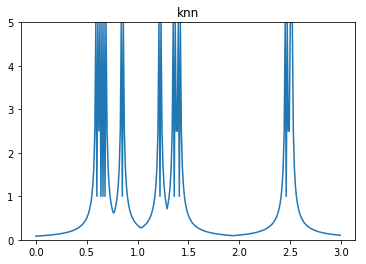

k = 3 时


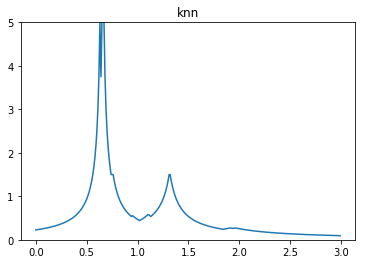

k = 5 时


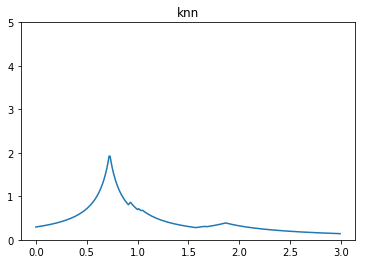

In [10]:
"""
    第一问
"""
k = [1,3,5]
for i in range(3):
    print("k = %d 时"%(k[i]))
    x = np.arange(0, 3, 0.01)
    y = []
    for j in x:
        y.append(knn(w3[0], np.array([j]), k[i]))
    plt.title("knn")
    y = np.array(y)
    plt.ylim(0, 5)
    plt.plot(x, y)
    plt.show()


k = 1 时


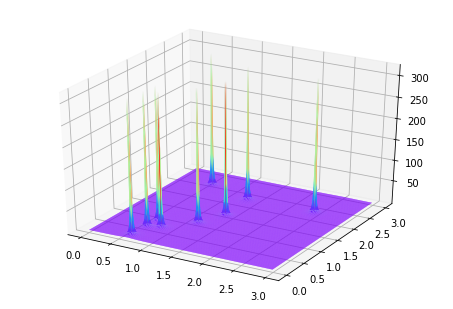

k = 3 时


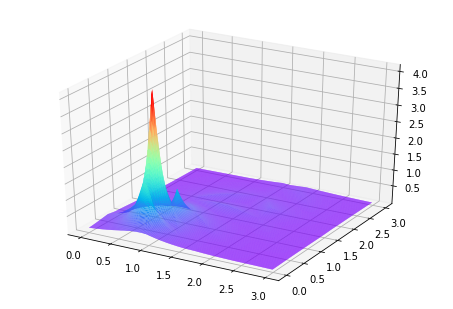

k = 5 时


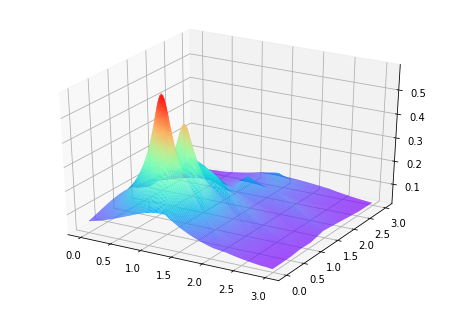

In [11]:
"""
    第二问
"""
k = [1,3,5]
for l in range(3):
    print("k = %d 时"%(k[l]))   
    
    x1 =  np.arange(0, 3, 0.01)
    x2 =  np.arange(0, 3, 0.01)
    x1, x2 = np.meshgrid(x1, x2)
    z = []
    for i in range(x1.shape[0]):
        t = []
        for j in range(x1.shape[1]):
            t.append(knn(w3[0:2].T, np.array([x1[i][j],x2[i][j]]), k[l]))
        z.append(t)
    z = np.array(z)
#     绘制图像
    fig = plt.figure()
    ax = Axes3D(fig)  
    ax.plot_surface(x1, x2, z, rstride = 1,   # row 行步长
                     cstride = 2,           # colum 列步长
                     cmap=plt.cm.rainbow )      # 渐变颜色
    plt.show()

In [ ]:
"""
    第三问
"""
x1 = np.array([-0.41, 0.82, 0.88])
x2 = np.array([0.14, 0.72, 4.1])
x3 = np.array([-0.81, 0.61, -0.38])
k = 3
x = [x1, x2, x3]
data = [w1, w2, w3]
print("k = 3 时")
for i in range(3):
    for j in range(3):
        print("x%d是w%d的条件概率为%f"%(i+1,j+1,knn(data[j].T, x[i], k)))
    print("\n")


k = 3 时
x1是w1的条件概率为0.002100
x1是w2的条件概率为0.055297
x1是w3的条件概率为0.035834


x2是w1的条件概率为0.004289
x2是w2的条件概率为0.000965
x2是w3的条件概率为0.002051


x3是w1的条件概率为0.002633
x3是w2的条件概率为0.086855
x3是w3的条件概率为0.008455


